In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

In [47]:
np.random.seed(50)
#intercept = 25 and slope = 0.5
theta_true = (25, 0.5) # alpha, beta
xtrue = 100 * np.random.random(1000) #Choose a Uniform distribution in x
# xtrue = np.random.normal(40,10,size=100) #Choose a Gaussian distribution in x
ytrue = theta_true[0] + theta_true[1] * xtrue 

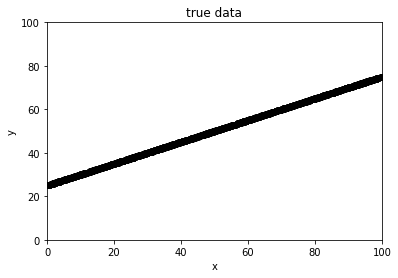

In [48]:
plt.plot(xtrue, ytrue, 'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,100)
plt.ylim(0,100)
plt.title("true data")
plt.show()

In [74]:
y_std = 10
x_std = 10

ydata = np.random.normal(ytrue,y_std)
ydata_err = np.zeros(len(ytrue)) + y_std

xdata = np.random.normal(xtrue,x_std)
xdata_err =  np.zeros(len(xtrue)) + x_std


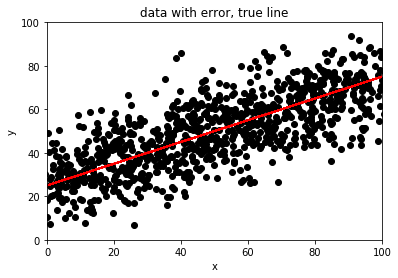

In [75]:
plt.plot(xdata, ydata, 'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,100)
plt.ylim(0,100)
y_hat = theta_true[0] + theta_true[1]*xdata
plt.plot(xdata,y_hat,color='r')
plt.title("data with error, true line")
plt.show()

In [81]:
with Model() as uniform_basic_model:
    alpha = Uniform('alpha', 0, 100)
    beta = Uniform('beta', 0, 100)
    sigma = Uniform('sigma', 0, 20)
    
    # Expected value of outcome
    mu = alpha + beta * xdata

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=ydata)
    
map_estimate1 = pm.find_MAP(model = uniform_basic_model)

print(map_estimate)
print("rel. error on slope:", np.abs(theta_true[0] - map_estimate["alpha"]) / theta_true[0])
print("rel. error on intercept:", np.abs(theta_true[1] - map_estimate["beta"]) / theta_true[1])

logp = -3,867.9, ||grad|| = 199.99: 100%|██████████████████████████████████████████████| 30/30 [00:04<00:00,  7.33it/s]


{'alpha_interval__': array(-0.97815288), 'beta_interval__': array(-5.39213261), 'sigma_interval__': array(0.26093234), 'alpha': array(27.32584464), 'beta': array(0.45316257), 'sigma': array(11.29730936)}
rel. error on slope: 0.09303378568830169
rel. error on intercept: 0.09367486425317029


In [82]:
with Model() as normal_basic_model:
    alpha = Normal('alpha', 20, 5)
    beta = Normal('beta', 1, .5)
    sigma = Normal('sigma', 7)
    
    # Expected value of outcome
    mu = alpha + beta * xdata

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=ydata)
    
map_estimate2 = pm.find_MAP(model = normal_basic_model)

print(map_estimate2)
print("rel. error on slope:", np.abs(theta_true[0] - map_estimate2["alpha"]) / theta_true[0])
print("rel. error on intercept:", np.abs(theta_true[1] - map_estimate2["beta"]) / theta_true[1])

logp = -3,883.8, ||grad|| = 594.46: 100%|██████████████████████████████████████████████| 28/28 [00:04<00:00,  6.00it/s]


{'alpha': array(27.18351793), 'beta': array(0.45532689), 'sigma': array(11.05269749)}
rel. error on slope: 0.08734071707389035
rel. error on intercept: 0.08934621269013931


In [85]:
with Model() as basic_mcmc_model:
    alpha = Uniform('alpha', 0, 100)
    beta = Uniform('beta', 0, 100)
    sigma = Uniform('sigma', 0, 20)
    
    # Expected value of outcome
    mu = alpha + beta * xdata

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=ydata)

    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    trace = pm.sample(5000, step=step, chains = 1)

Sequential sampling (1 chains in 1 job)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
  0%|                                                                                         | 0/5500 [00:00<?, ?it/s]


ValueError: Sampling stopped before a sample was created.